# Replicating Calvano et al. (2020)
## Baseline - Stat des - Prices
### Author: Andréa Epivent

In [1]:
# Set working directory
import os
path = os.getcwd()

# Import packages
exec(open(path+"/packages.py").read())

# Import custom functions
from functions import *

# Import parameters
exec(open(path+"/parameters.py").read())

In [2]:
# Import data from training
q_table_1 = np.load(path+'/Output/Baseline/q_table_a1.npy')
q_table_2 = np.load(path+'/Output/Baseline/q_table_a2.npy')
A = np.load(path+'/Output/Baseline/actions.npy')
S = np.load(path+'/Output/Baseline/states.npy')
conv_info = np.load(path+'/Output/Baseline/conv_info.npy')

### Retrieve final price

In [3]:
# Stock last price for both agents for each episode
price1, price2 = conv_info[1,:], conv_info[2,:]

### Retrieve forward prices

<b>Comment</b>: if we retrieve prices at the end of the episode, there might be noise as exploration is still feasible (although unlikely), instead we can retrieve forward prices (i.e. prices after convergence when learning is stopped).

In [4]:
# Stock next 10 price for both agents for each episode
f_price1, f_price2 = get_forward_prices(10,q_table_1,q_table_2,conv_info,S,A)

In [6]:
# Save for later use
np.save(path+'/Output/Baseline/price1', price1)
np.save(path+'/Output/Baseline/price2', price2)
np.save(path+'/Output/Baseline/f_price1', f_price1)
np.save(path+'/Output/Baseline/f_price2', f_price2)

### Descriptive statistics

* Processing

In [7]:
# Concatenate info in dataframe
df_p1 = pd.DataFrame(price1,columns=["Final price"])
df_p1["Forward mean price"] = f_price1.mean(axis=1)
df_p1["agent"] = 1

df_p2 = pd.DataFrame(price2,columns=["Final price"])
df_p2["Forward mean price"] = f_price2.mean(axis=1)
df_p2["agent"] = 2

df_prices = pd.concat([df_p1,df_p2]).reset_index()

* Descriptive statistics for single final price (Figure 3)

Text(0.5, 0, 'Agent')

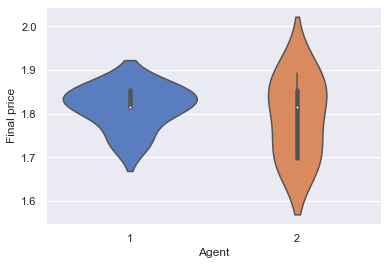

In [8]:
ax = sns.violinplot(x="agent",y="Final price", data=df_prices, palette="muted")
plt.xlabel('Agent')

Text(0.5, 0, 'Agent')

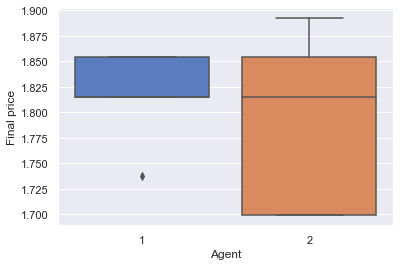

In [9]:
ax = sns.boxplot(x="agent",y="Final price", data=df_prices, palette="muted")
plt.xlabel('Agent')

* Descriptive statistics averaging forward 10 prices

Text(0.5, 0, 'Agent')

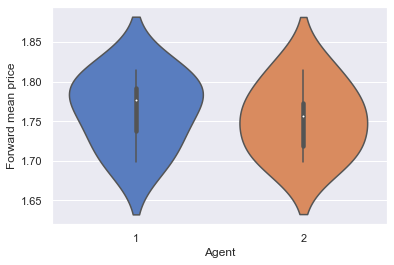

In [10]:
ax = sns.violinplot(x="agent",y="Forward mean price", data=df_prices, palette="muted")
plt.xlabel('Agent')